# 데이터 로드

In [4]:
from sklearn.datasets import load_iris

# Iris 데이터셋 로드
iris = load_iris()

# 데이터와 타겟을 분리
X = iris.data
y = iris.target

print("Features:", X.shape)
print("Target:", y.shape)

Features: (150, 4)
Target: (150,)


In [13]:
# 로컬디스크에 데이터셋 저장
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# 3. 라벨(종)을 숫자에서 이름으로 변환
iris_df['Label'] = iris.target
iris_df['Label'] = iris_df['Label'].map(dict(enumerate(iris.target_names)))

# 4. DataFrame을 CSV 파일로 저장
file_path = 'iris_dataset.csv'
iris_df.to_csv(file_path, index=False)


In [26]:
from google.colab import drive
import os

drive.mount('/content/drive')
print(os.getcwd())
#$ls /content/
# Google Drive에 파일 저장
file_path = '/content/drive/MyDrive/SeSAC/iris_dataset.csv'
iris_df.to_csv(file_path, index=False)
# Google Drive에서 데이터 로드
myData = pd.read_csv(file_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content


In [27]:
!ls /content/drive/MyDrive/SeSAC

'11주 자료.zip'			       'Data (1)'
 1_주요라이브러리.ipynb		        iris_dataset.csv
 2_matplotlib.ipynb		        No01_iris_data.ipynb
 2_전처리.ipynb			        part3_1.회귀.ipynb
 3_분류_로지스틱_소프트맥스_ANN.ipynb   part3_2.분류.ipynb
 3_인공지능_알고리즘.ipynb	        part3_3.군집.ipynb
 4_시스템설계.ipynb		        part5.ipynb
 Data


In [29]:
# 전처리를 위한 라이브러리 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 파일 로드
colab_path = "gdrive/My Drive/"
#df = pd.read_csv(colab_path + 'part3_iris_modified.csv')
df = myData

### 라이브러리 로드

In [30]:
# 전처리를 위한 라이브러리 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Iris Dataset 분석

In [49]:
from sklearn.datasets import load_iris

# Iris 데이터셋 로드
iris = load_iris()

# 데이터와 타겟을 분리
X = iris.data
y = iris.target

print("Features:", X.shape)
print("Target:", y.shape)

Features: (150, 4)
Target: (150,)


In [61]:
feature_names = [name.split()[0]+'_'+name.split()[1] for name in iris.feature_names]
feature_names

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

### iris 데이터셋을 디스크에 저장한다.
   local disk는 재구동하면 데이터가 사라짐

In [97]:
# 로컬디스크에 데이터셋 저장
feature_names = [name.split()[0]+'_'+name.split()[1] for name in iris.feature_names]
feature_names

iris_df = pd.DataFrame(data=iris.data, columns=feature_names)

# 3. 라벨(종)을 숫자에서 이름으로 변환
iris_df['Label'] = iris.target
iris_df['Label'] = iris_df['Label'].map(dict(enumerate(iris.target_names)))


# 4. DataFrame을 CSV 파일로 저장
file_path = 'iris_dataset.csv'
iris_df.to_csv(file_path, index=False)

In [98]:
from google.colab import drive
drive.mount('/content/drive')

# Google Drive에 파일 저장
file_path = '/content/drive/MyDrive/SeSAC/iris_dataset.csv'

feature_names = [name.split()[0]+'_'+name.split()[1] for name in iris.feature_names]
iris_df = pd.DataFrame(data=iris.data, columns=feature_names)

iris_df.to_csv(file_path, index=False)
# Google Drive에서 데이터 로드
myData = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
df = pd.DataFrame(data=iris.data, columns=feature_names)

# 3. 라벨(종)을 숫자에서 이름으로 변환
df['Label'] = iris.target
df['Label'] = df['Label'].map(dict(enumerate(iris.target_names)))

# 4. DataFrame을 CSV 파일로 저장
path = 'iris_dataset.csv'
df.to_csv(file_path, index=False)

# 분석용 데이터 준비 - 결측치 처리

In [95]:
# 로드된 데이터 확인
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Label'],
      dtype='object')

### 결측치 존재 확인

In [96]:

feature_names = [name.split()[0]+'_'+name.split()[1] for name in iris.feature_names]
feature_names

# data 오염
df = pd.read_csv(file_path)
df.loc[(df['sepal_width'] > 3.0) & (df['sepal_width'] < 3.2), 'sepal_width'] = np.nan
df.loc[(df['petal_length'] >6.0), 'petal_length'] = 30


KeyError: 'sepal_width'

In [83]:
#결측치존재여부확인
# isnull(), isna()동일
df.isnull().sum()


,0
sepal_length,0
sepal_width,11
petal_length,0
petal_width,0
Label,0


In [84]:
# True = 1로도해석된다는점을이용하여평균값산정(= Column별결측치비율)
df.isnull().mean() * 100

,0
sepal_length,0.000000
sepal_width,7.333333
petal_length,0.000000
petal_width,0.000000
Label,0.000000


In [42]:
 #결측치를포함하는데이터만추출하여확인
# isnull()이True인행만select
df[df['sepal width (cm)'].isnull()]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Label


### 결측치 포함 데이터를 제외

In [43]:
 #결측치포함한데이터를제거
df_processed = df.dropna()
len(df_processed)

150

### 결측치를 평균 값으로 대체

In [86]:
#대체할값계산
replace_value = df['sepal_width'].mean().round(2)
replace_value

np.float64(3.05)

In [88]:
# ffill: forward-fill (이전값으로 대체)
# bfill: back-fill (뒤에오는 값으로 대체)
df_processed = df.fillna(method="ffill")
df_processed

<ipython-input-88-1545287135>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_processed = df.fillna(method="ffill")


,sepal_length,sepal_width,petal_length,petal_width,Label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.2,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### 결측치를 이전/다음 값으로 대체

([<matplotlib.axis.XTick at 0x7a469d652950>,
 [Text(1, 0, 'sepal_length'),
  Text(2, 0, 'sepal_width'),
  Text(3, 0, 'petal_length'),
  Text(4, 0, 'petal_width')])

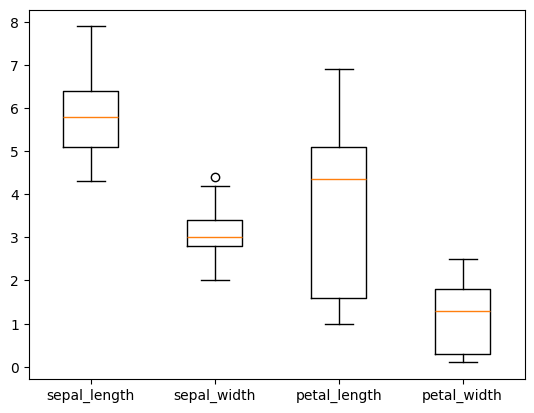

In [89]:
#결측치처리를수행한df_processed를이어서사용한다.
 # Box Plot을그려시각적으로확인해본다.
plt.boxplot([df_processed['sepal_length'], df_processed['sepal_width'], df_processed['petal_length'], df_processed['petal_width']])
plt.xticks([1, 2, 3, 4,],['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

# 분석용 데이터 준비 - 이상값 처리

### 이상값 처리 (IQR 기준)

In [103]:
 #결측치처리를수행한df_processed를이어서사용한다.
 # Box Plot을그려시각적으로확인해본다.
 plt.boxplot([df_processed['sepal_length'], df_processed['sepal_width'], df
 _processed['petal_length'], df_processed['petal_width']])
 plt.xticks([1, 2, 3, 4,],['sepal_length', 'sepal_width', 'petal_length', '
 petal_width'])

SyntaxError: unterminated string literal (detected at line 5) (<ipython-input-103-2527779622>, line 5)

In [102]:
#시각적으로Outlier을포함하는것으로보이는'petal_length＇에대해이상치확인
# 1사분위수보다1.5 IQR보다작거나3사분위수보다1.5 IQR큰수의Boolean
Array를구한 후, 해당하는 데이터를 구한다.
 q1, q3 = np.percentile(df_processed['petal_length'], [25, 75])
 iqr = q3-q1
 lower_bound = q1-(iqr * 1.5)
 upper_bound = q3 + (iqr * 1.5)
 outlier_filter = (df_processed['petal_length'] < lower_bound) | (df_proce
 ssed['petal_length'] > upper_bound)
 df_processed[outlier_filter]

SyntaxError: invalid syntax (<ipython-input-102-1185843088>, line 3)

In [101]:
#이상치를제거
df_processed2 = df_processed[~outlier_filter]
 len(df_processed2)

IndentationError: unexpected indent (<ipython-input-101-1947402356>, line 3)

### 이상값 처리 (z-score기준)

In [100]:
# petal_length데이터정규화하기(z-score구하기)
 petal_length_avg = df_processed['petal_length'].mean()
 petal_length_std = df_processed['petal_length'].std()
 z_score = (df_processed['petal_length']
petal_length_avg) / petal_length_std

IndentationError: unexpected indent (<ipython-input-100-112887544>, line 2)

In [ ]:
 # z-score의 분포를 표준정규분포와 함께plotting하여확인하기
x = np.arange(-4, 4, 0.01)
 y = (lambdax: 1/np.sqrt(2*np.pi)/np.exp(x**2/2))(x)
 plt.plot(x, y) #표준정규분포그리기위한데이터만들기
plt.hist(z_score, density=True) #히스토그램의면적이1이 되도록

In [99]:
#이상치확인
outlier_filter2 = ( z_score <-3 ) | ( z_score > 3 )
df_processed[outlier_filter2]

IndentationError: unexpected indent (<ipython-input-99-506093639>, line 3)

In [ ]:
#이상치를제거
df_processed2 = df_processed[~outlier_filter2]
 len(df_processed2)

# 분석용 데이터 준비 - 데이터 정규화

In [ ]:
from sklearn import preprocessing
# https://scikit-learn.org/stable/modules/preprocessing.html

# 결측치/이상치 처리를 수행한 df_processed2를 이어서 사용한다.
columns_to_scale = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [ ]:
# z-score스케일링(표준정규화)
 df_scaled_standardized = df_processed2.copy()
 scaler = preprocessing.StandardScaler()
 df_scaled_standardized[columns_to_scale] = scaler.fit_transform(df_process
 ed2[columns_to_scale])
 df_scaled_standardized

In [ ]:
#표준스케일링(Min-Max정규화)
 df_scaled_normalized = df_processed2.copy()
 scaler = preprocessing.MinMaxScaler() #min, max값을직접지정해줄수있음. d
 efault: 0 ~ 1
 df_scaled_normalized[columns_to_scale] = scaler.fit_transform(df_processed
 2[columns_to_scale])
 df_scaled_normalized

In [ ]:
 #정규화 결과 비교
plt.figure(figsize=(10,15))
 plt.subplot(3, 1, 1)
 df_processed[columns_to_scale].boxplot()
 plt.title('original data')
 plt.subplot(3, 1, 2)
 df_scaled_standardized[columns_to_scale].boxplot()
 plt.title('z-score scaled data')
 plt.subplot(3, 1, 3)
 df_scaled_normalized[columns_to_scale].boxplot()
 plt.title('Min-Max scaled data')

# 탐색적 분석 - 기초 통계량 추출

In [ ]:
# pandas에서 제공하는 기초 통계량 제공 함수를 활용한다.
df.describe()

In [ ]:
# 앞서 pandas 라이브러리 주요기능에서 살펴본 Column별 unique값, GroupBy를 통한 품종별 통계 등을 탐색해본다.
df.groupby('target').mean()

# 탐색적 분석 - 산포도 분석

In [ ]:
# 히스토그램
hist1 = df_processed2['sepal_length']
hist2 = df_processed2['petal_length']

 plt.hist(hist1,label='sepal_length', alpha=0.5, bins=25)
 plt.hist(hist2,label='petal_length', alpha=0.5, bins=25)
 plt.legend(loc=0)

# 탐색적 분석 - 상관관계 분석

In [ ]:
# Scatter Plot
X = df_processed2['sepal_length']
Y = df_processed2['petal_length']

 plt.scatter(X, Y, alpha=0.5)

In [ ]:
 #상관계수구하기
np.corrcoef(X, Y)

In [ ]:
 #각Feature간의상관계수구하기
df_processed2.corr(method='pearson')